In [9]:
from functools import reduce
import requests

def med(values):
    sorted_values = sorted(values)
    if len(sorted_values) == 0:
        return 0
    else:
        return int(sorted_values[len(sorted_values)//2])

In [38]:
vacancies = []
for i in range(5):
    r = requests.get('http://api.hh.ru/vacancies?text=программист С++&per_page=100&page={}'.format(i))
    vacancies += r.json()['items']

In [39]:
grouped_vacancies = dict()
for vac in vacancies:
    if vac['name'] in grouped_vacancies:
        grouped_vacancies[vac['name']].append(vac)
    else:
        grouped_vacancies[vac['name']] = [vac]

In [40]:
salaries = dict(sorted(filter(lambda x: x[1] != 0,
                         {name: med(map(lambda x: (x['salary']['from'] + x['salary']['to'])/2 
                          if x['salary']['to'] and x['salary']['from']
                          else x['salary']['from'] or 0 + x['salary']['to'] or 0,
                          filter(lambda x: x['salary']['currency'] == 'RUR',
                          filter(lambda x: x['salary'], cur))))
                          for name, cur in grouped_vacancies.items()}.items()), key=lambda x:x[1]))

In [41]:
for name, salary in list(salaries.items())[:5]:
    print(name, ' -> ', salary)

Программист 1С, 1С Битрикс  ->  17500
Программист 1С/Начинающий специалист  ->  25000
Специалист по внедрению/Программист 1С  ->  25000
Помощник 1С программиста  ->  30000
Программист-стажер 1С  ->  30000


In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([ 6., 11., 13., 33., 26.,  6.,  1.,  0.]),
 array([     0,  40000,  60000,  80000, 120000, 160000, 200000, 250000,
        300000]),
 <a list of 8 Patch objects>)

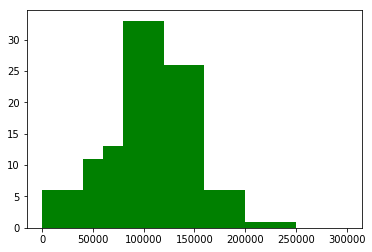

In [43]:
bins=[0, 40000, 60000, 80000, 120000, 160000, 200000, 250000, 300000]
plt.hist(salaries.values(), bins=bins, color='g')

Text(0,0.5,'Должность')

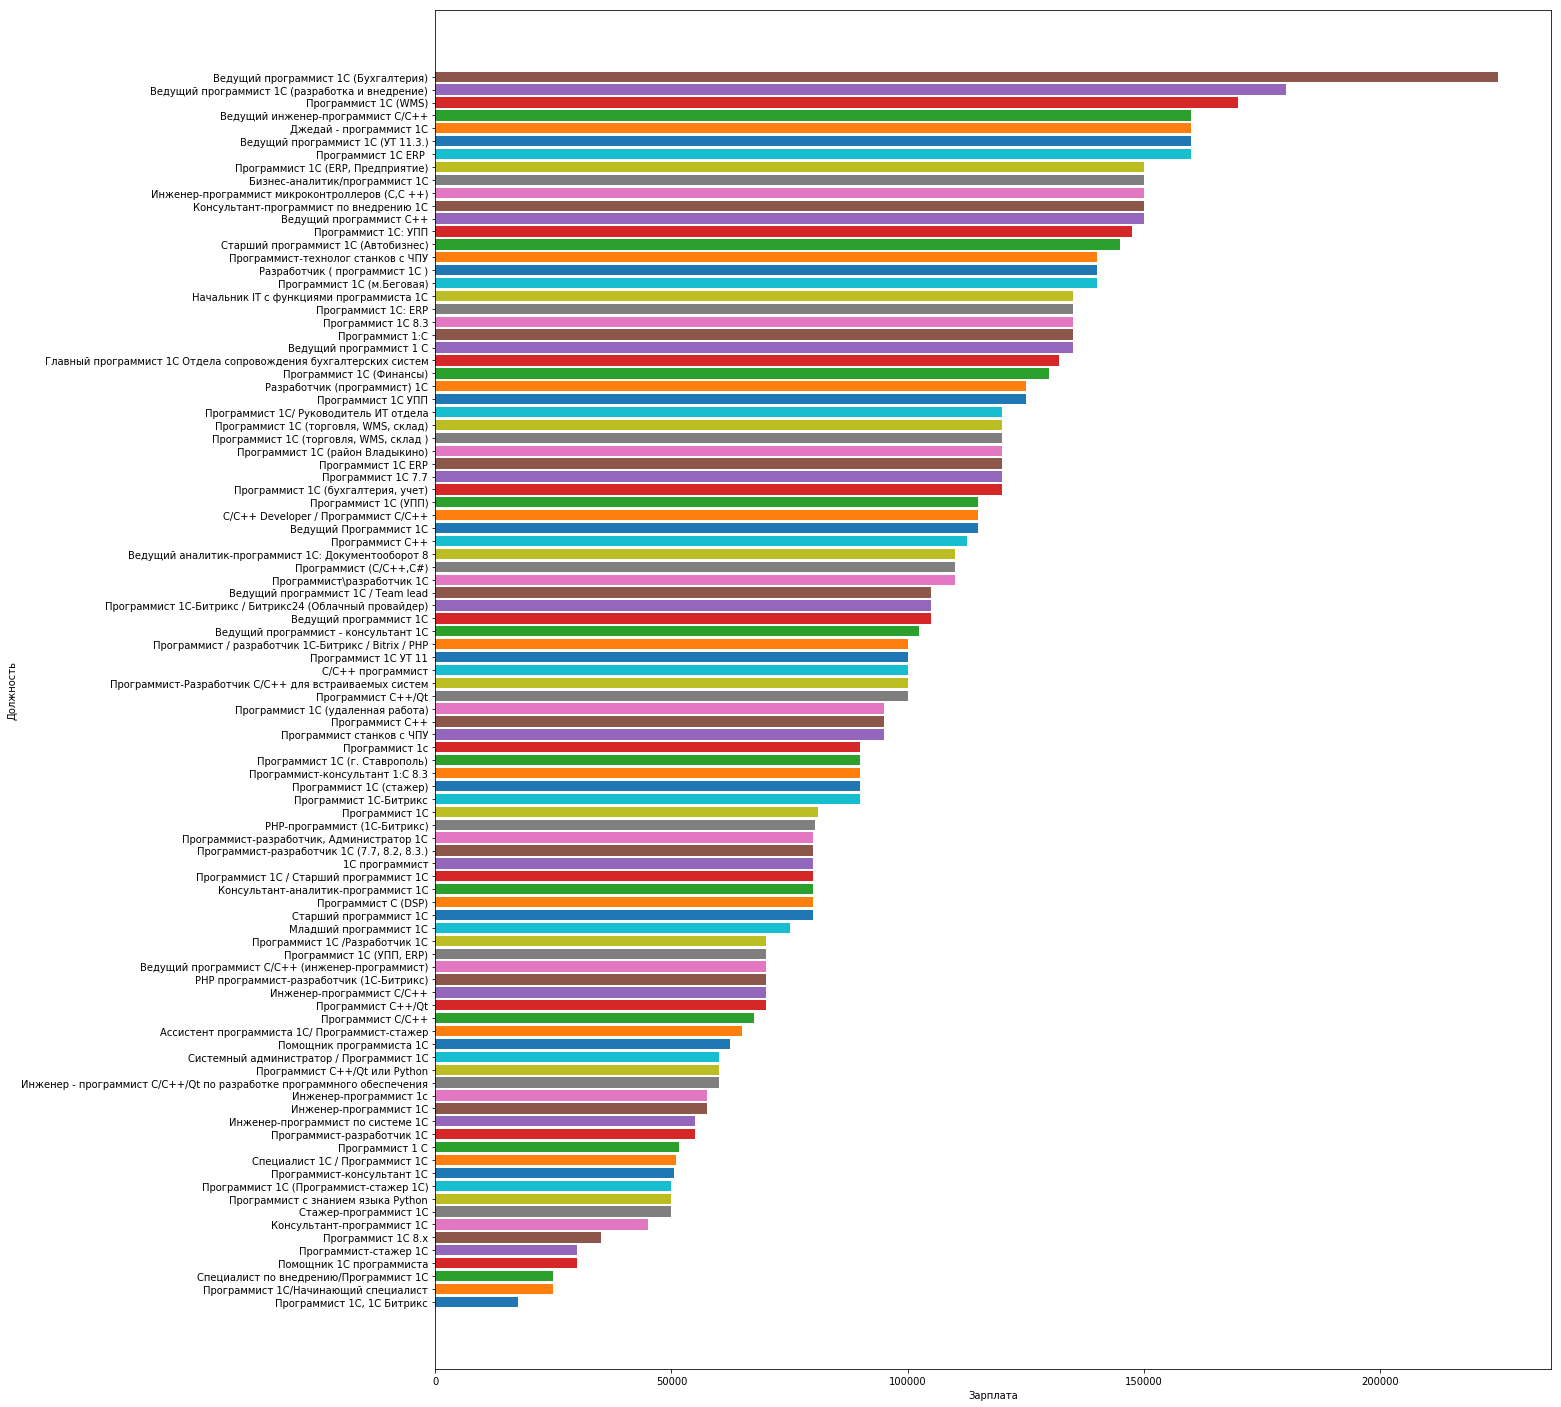

In [44]:
fig, ax = plt.subplots(figsize=(20,25))
for name, salary in salaries.items():
    ax.barh(name, salary)
plt.xlabel('Зарплата')
plt.ylabel('Должность')